In [63]:
import torch
import torch.nn as nn
from torch.utils.data import random_split, DataLoader

import matplotlib.pyplot as plt

from gdeep.create_nets import Net
from gdeep.create_nets.utility import ToPyTorchNN

In [31]:
# Create Dataset

n = 2
n_data_points = 100

means = [0.25, 0.5, 0.75]
stds = [0.05] * 3

X_unclamped = torch.cat([torch.normal(means[i], stds[i], (n_data_points, n)) for i in range(3)])
X = torch.clamp(X_train_unclamped, 0., 1.)
y = torch.cat((
    torch.zeros(n_data_points),
    torch.ones(n_data_points),
    torch.zeros(n_data_points)
))

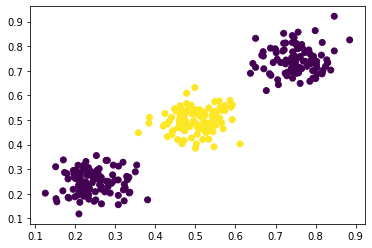

In [54]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.show()

In [56]:
def dataset_split(dataset, training_percentage = 0.8):
    training_size = int(0.8 * len(dataset))
    validation_size = len(dataset) - training_size
    return random_split(dataset, lengths=[training_size, validation_size])
dataset = torch.utils.data.dataset.TensorDataset(X,y)
train_dataset, validation_dataset = dataset_split(dataset, training_percentage=0.8)

batch_size = 128

train_dl = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=8,
)
val_dl = DataLoader(
    validation_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=8,
)

In [64]:
model_fastai = Net([2, 5, 5, 5])
model = ToPyTorchNN(model_fastai)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

def fit(model, criterion, optimizer, n_epochs):
    for epoch in range(n_epochs):
        print(f"Epoch {epoch+1}/{n_epochs} ...")

        # Train
        model.train()  # IMPORTANT
        running_loss, correct = 0.0, 0
        for X, y in train_dl:
            X, y = X.to(device), y.to(device)

            optimizer.zero_grad()
            y_ = model(X)
            loss = criterion(y_, y)

            loss.backward()
            optimizer.step()

            # Statistics
            #print(f"    batch loss: {loss.item():0.3f}")
            _, y_label_ = torch.max(y_, 1)
            correct += (y_label_ == y).sum().item()
            running_loss += loss.item() * X.shape[0]
        print(
            f"  "
            f"loss: {running_loss / len(train_dl.dataset):0.3f} "
            f"acc:  {correct / len(train_dl.dataset):0.3f}"
        )

        # Eval
        model.eval()  # IMPORTANT
        running_loss, correct = 0.0, 0
        with torch.no_grad():  # IMPORTANT
            for X, y in val_dl:
                X, y = X.to(device), y.to(device)

                y_ = model(X)
                loss = criterion(y_, y)

                _, y_label_ = torch.max(y_, 1)
                correct += (y_label_ == y).sum().item()            
                running_loss += loss.item() * X.shape[0]
        print(
            f"  "
            f"val_loss: {running_loss / len(val_dl.dataset):0.3f} "
            f"val_acc:  {correct / len(val_dl.dataset):0.3f}"
        )

In [65]:
fit(model, criterion, optimizer, n_epochs=2)

Epoch 1/2 ...


NameError: name 'train_dl' is not defined

In [ ]:
0.2